<a href="https://colab.research.google.com/github/Samenergy/Tensorflow-Participation-Assignment/blob/main/Tensorflow_Participation_Assignment_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Samuel Dushime
Willy Kalisa

Complete the code as discussed the class :
Load any data of you choice
Make sure you clearly define the X and the Y after loading
Ensure the number of classes is accurate
Add atleast 1 layer with 128 neurons

compilte and fit to data
'''

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Load data
from tensorflow.keras.datasets import mnist

In [ ]:
# Using MNIST dataset as an example
data = tf.keras.datasets.mnist.load_data()
(X_train_full, Y_train_full), (X_test, Y_test) = data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [ ]:
# Flatten the images for the dense layers
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# Split the training data into training and validation sets
X_train = X_train_full[:50000]
Y_train = Y_train_full[:50000]
X_val = X_train_full[50000:]
Y_val = Y_train_full[50000:]

In [ ]:
# One-hot encode the labels
num_classes = 10
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)


In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))  # Additional hidden layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8631 - loss: 0.4629 - val_accuracy: 0.9640 - val_loss: 0.1301
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9659 - loss: 0.1150 - val_accuracy: 0.9678 - val_loss: 0.1073
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9762 - loss: 0.0788 - val_accuracy: 0.9687 - val_loss: 0.1133
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9817 - loss: 0.0548 - val_accuracy: 0.9693 - val_loss: 0.1062
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0408 - val_accuracy: 0.9754 - val_loss: 0.0957
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9900 - loss: 0.0295 - val_accuracy: 0.9749 - val_loss: 0.0893
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9692 - val_loss: 0.1091
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9927 - loss: 0.023

In [ ]:
# Save the model
model.save('prep_model.h5')


In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('prep_model.h5')

In [ ]:
# Make predictions
predictions = loaded_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Display the model summary
model.summary()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1354
Test Loss: 0.10939314216375351
Test Accuracy: 0.9742000102996826


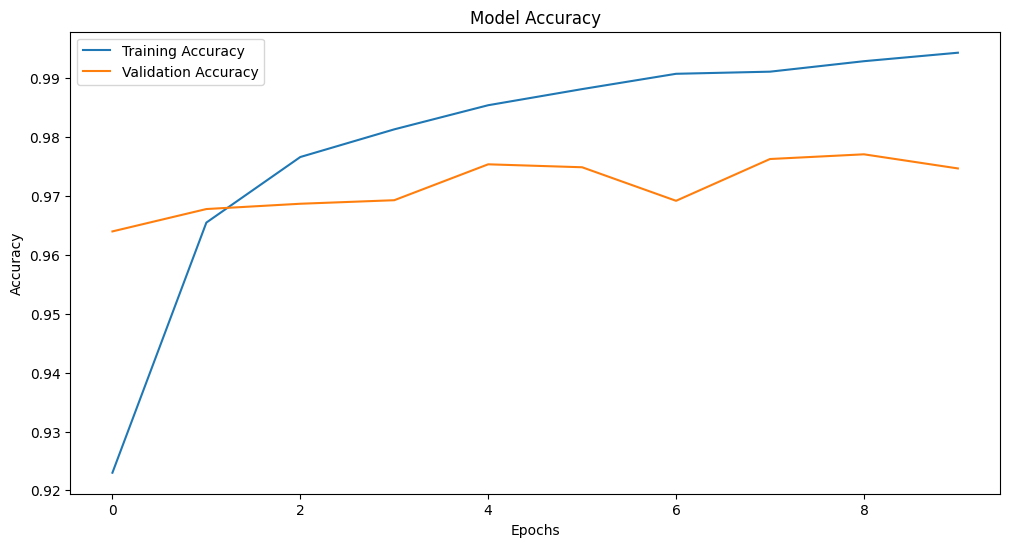

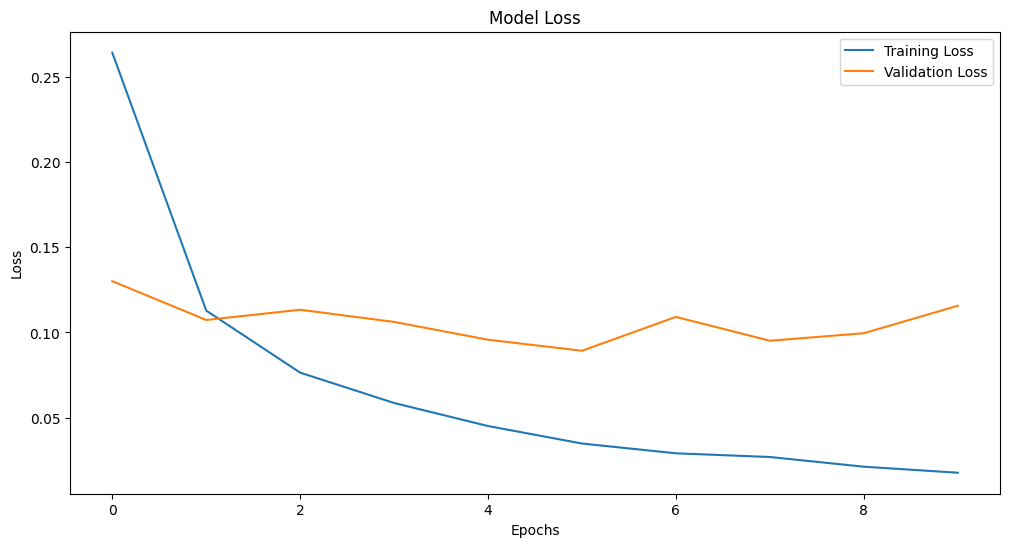

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
